In [6]:
#Realiza os imports necessários
import cv2
import numpy as np
import skimage.color
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import matplotlib.patches as patches
import matplotlib.colors as colors
from skimage import io, color
import math
import time

In [2]:
#Checa a versão do openCV que está sendo usada
cv2.__version__

'3.4.5'

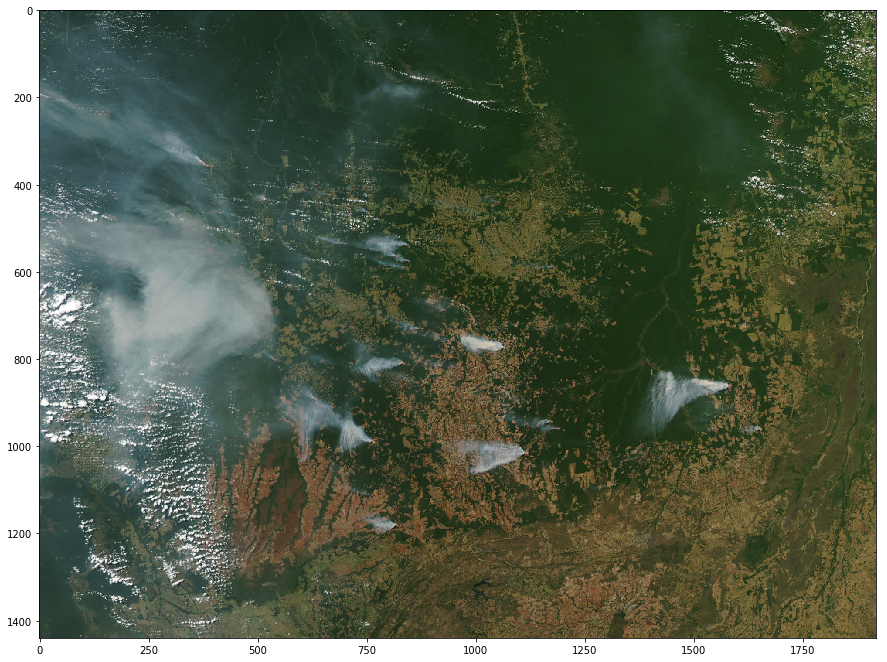

In [13]:
#img = plt.imread('capitol.tiff')
#img = cv2.imread('Imagens/Alta_Floresta_AMO_2007217_lrg.jpg',1)
#img = cv2.imread('Imagens/def3.jpg'img = cv2.imread('Imagens/Brazil.A2003181.1720_lrg.jpg',1),1)
img = cv2.imread('Imagens/Brazil.A2003181.1720_lrg.jpg',1)
img = img[:, :, ::-1]

plt.figure(figsize = ((15,15)))
plt.imshow(img)

In [14]:
#Define a proporção entre os dois lados da imagem
prop = img.shape[1]/img.shape[0]

(480, 640, 3)


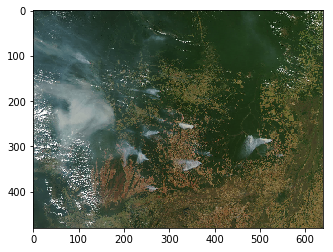

In [15]:
#Redimensiona a imagem para a mesma sempre ter 480 de altura, sem alterar as proporções
img = cv2.resize(img,(round(480*prop),480))
plt.imshow(img)
print(img.shape)

In [16]:
#Define o numero de clusters
num_clusters = 10

## RGB

[[116.85528103 102.32828154  66.55586687]
 [ 32.58156333  52.40094621  26.46906637]
 [155.22147439 166.0135661  163.16026922]
 [ 62.56777289  84.94518859  78.72537652]
 [ 43.94606742  65.21460674  51.37590512]
 [ 65.47594537  68.16743303  37.20000915]
 [220.85201436 223.8392501  220.87036298]
 [ 88.22878979 108.7185902  105.06603618]
 [ 91.75310345  84.63759354  50.3175642 ]
 [121.1079595  134.45121706 132.11050761]]


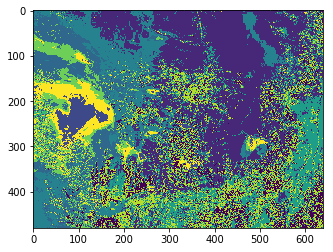

In [17]:
#Cria a imagem rodando o K-Meas
data = img.reshape(img.shape[0]*img.shape[1], 3)

km = KMeans(n_clusters=num_clusters)
km.fit(data)

#Printa os clusters encontrados
print(km.cluster_centers_)

labels = km.predict(data)
img_labels = labels.reshape(img.shape[:2])

plt.imshow(img_labels)

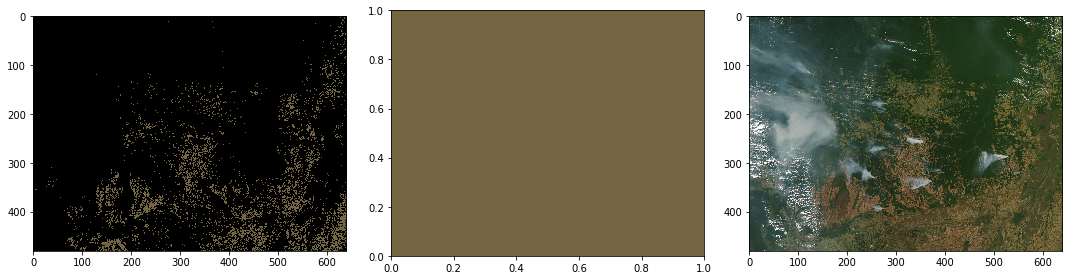

Cor em HEX =  #21341a


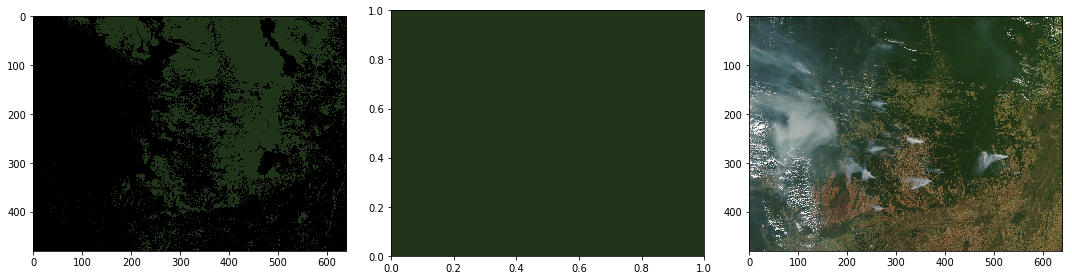

Cor em HEX =  #21341a


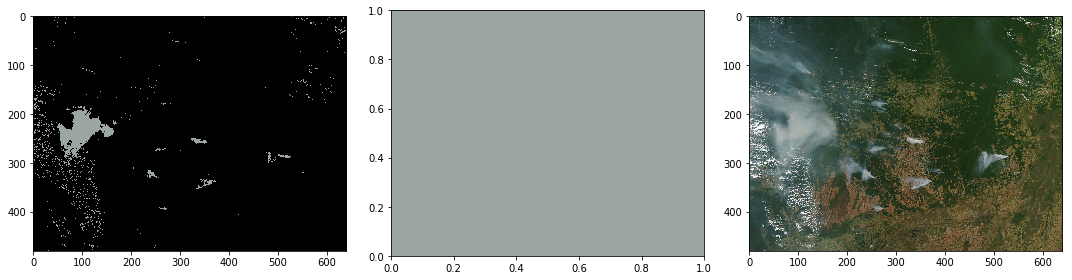

Cor em HEX =  #21341a


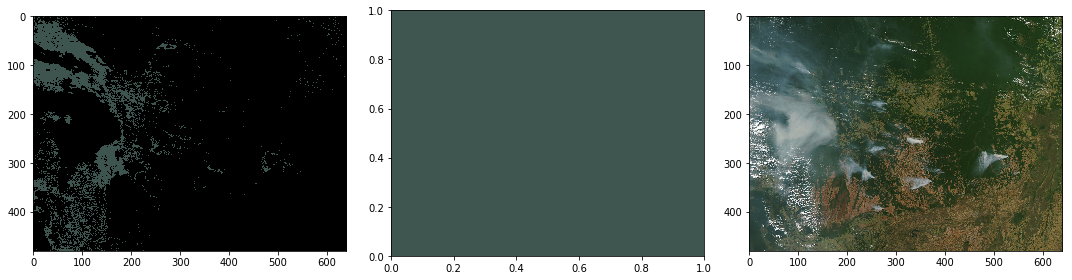

Cor em HEX =  #21341a


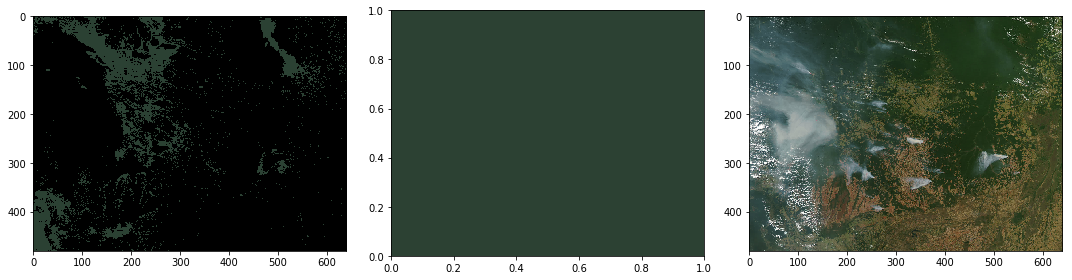

Cor em HEX =  #21341a


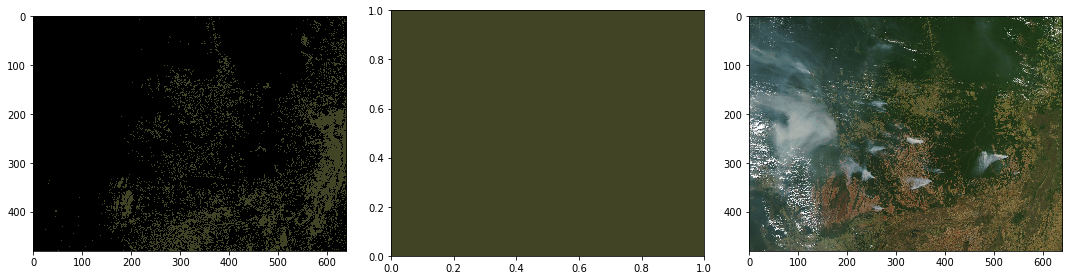

Cor em HEX =  #21341a


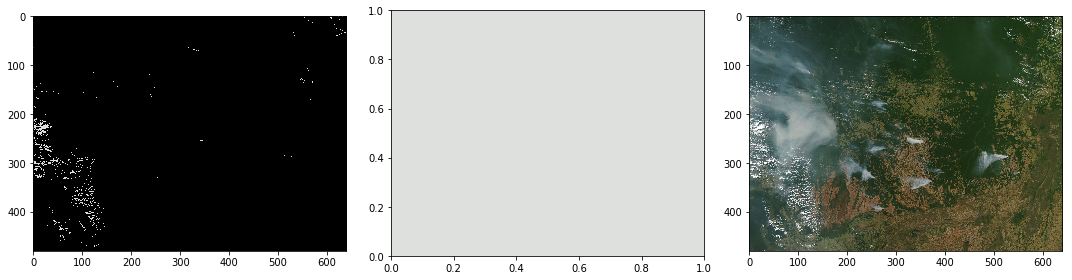

Cor em HEX =  #21341a


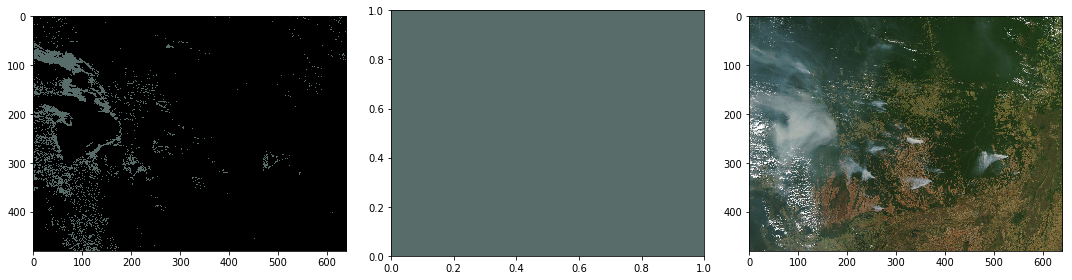

Cor em HEX =  #21341a


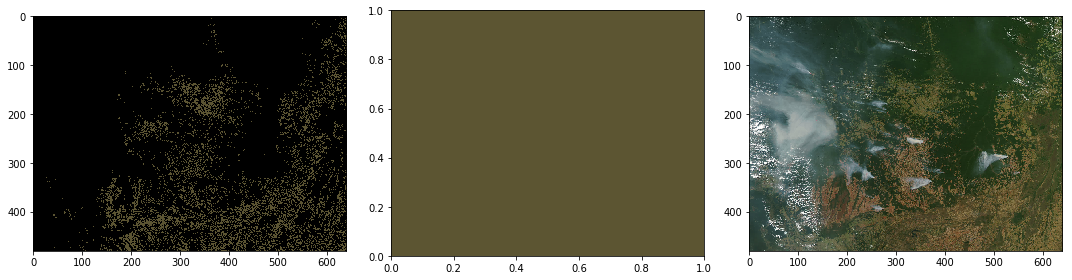

Cor em HEX =  #21341a


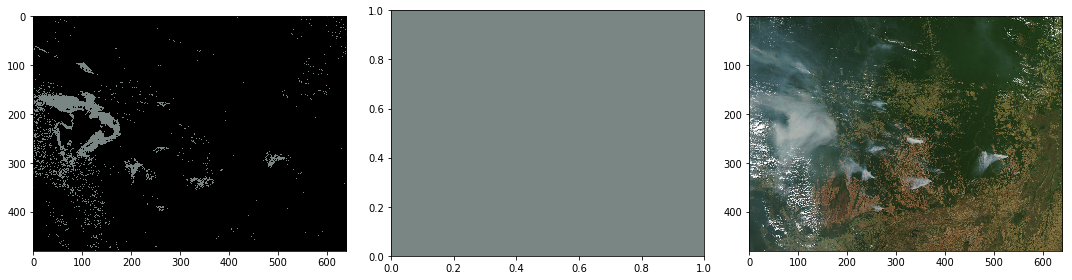

Cor em HEX =  #21341a


In [18]:
#Printa todos os clusters possíveis
hexColors = []
for label in range(num_clusters):
    img_label = np.zeros_like(img)
    mascara = img_labels==label
    
    img_label[mascara] = km.cluster_centers_[label]
    
    #Cria um retangulo da cor do label
    rec = patches.Rectangle((0, 0),1,1, color=(km.cluster_centers_[label]/255))
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    #f.set_figheight(5)
    f.set_figwidth(15)
    #Printa a imagem com cor
    ax1.imshow(img_label)
    #Printa retangulo
    ax2.add_patch(rec)
    #Printa imagem original
    ax3.imshow(img)
    f.tight_layout()
    plt.show()
    print("Cor em HEX = ", colors.to_hex(km.cluster_centers_[1]/255))
    hexColors.append(colors.to_hex(km.cluster_centers_[1]/255))
    

In [20]:
#Define variáveis que serão as cores padrão para desmatamento
#beje = (140,120,90)
#marromEscuro = (60,40,10)
#marromClaro = (95,74,46)
tonsMarrons = [(140,120,90),(60,40,10), (95,74,46)]

In [21]:
#Define variáveis que serão as cores padrão para queimada
#cinzaClaro = (202, 199, 193)
tonsCinza = [(202, 199, 193)]

In [22]:
def color_difference (color1, color2):
    return math.sqrt(sum([(abs(component1-component2))**2 for component1, component2 in zip(color1, color2)]))

In [23]:
print(km.cluster_centers_)

[[116.85528103 102.32828154  66.55586687]
 [ 32.58156333  52.40094621  26.46906637]
 [155.22147439 166.0135661  163.16026922]
 [ 62.56777289  84.94518859  78.72537652]
 [ 43.94606742  65.21460674  51.37590512]
 [ 65.47594537  68.16743303  37.20000915]
 [220.85201436 223.8392501  220.87036298]
 [ 88.22878979 108.7185902  105.06603618]
 [ 91.75310345  84.63759354  50.3175642 ]
 [121.1079595  134.45121706 132.11050761]]


In [30]:
defaultColors = tonsMarrons
chosenColors = set()
for i, clusterColor in enumerate(km.cluster_centers_):
    for color in defaultColors:
        dif = color_difference(color,clusterColor)
        print(i, dif)
        if dif < 30:
            chosenColors.add(i)
#Transforma o set em lista para poder indexar
chosenColors = list(chosenColors)
print(chosenColors)

0 37.384422257769664
0 101.56723752621821
0 41.26364631146374
1 141.9314346367081
1 34.30428957118893
1 68.87697532009966
2 87.75743011068974
2 220.01049086960776
2 160.6849433113705
3 85.74209428684095
3 82.15741483514002
3 47.356063779361875
4 117.13077300517624
4 51.04381126970155
4 52.08250687964855
5 105.01565955060626
5 39.53771312234462
5 31.354879654685895
6 185.59819502026772
6 322.7019528693432
6 262.43127526820876
7 55.08642173260111
7 120.65098610256939
7 68.84784980825637
8 71.78411055759888
8 68.0167649827182
8 11.93072060730351
9 48.363640475431346
9 166.03069350859084
9 108.40200512014623
[8]


In [31]:
#Escolher as cores para destacar
#chosenColors = [0, 3]

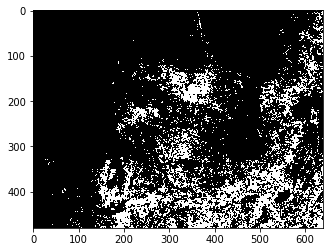

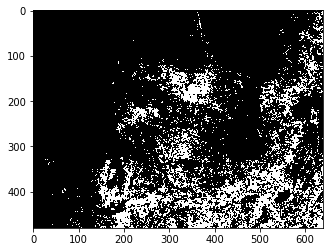

In [32]:
contourns = np.zeros((img.shape[0], img.shape[1]),dtype=bool)
for label in chosenColors:
    img_mask = img_labels==label
    binImg = ndi.binary_closing(img_mask, iterations=1)
    #print(binImg)
    contourns = (contourns) | (binImg)
    plt.figure()
    plt.imshow(binImg, 'gray')
plt.figure()
plt.imshow(contourns, 'gray')

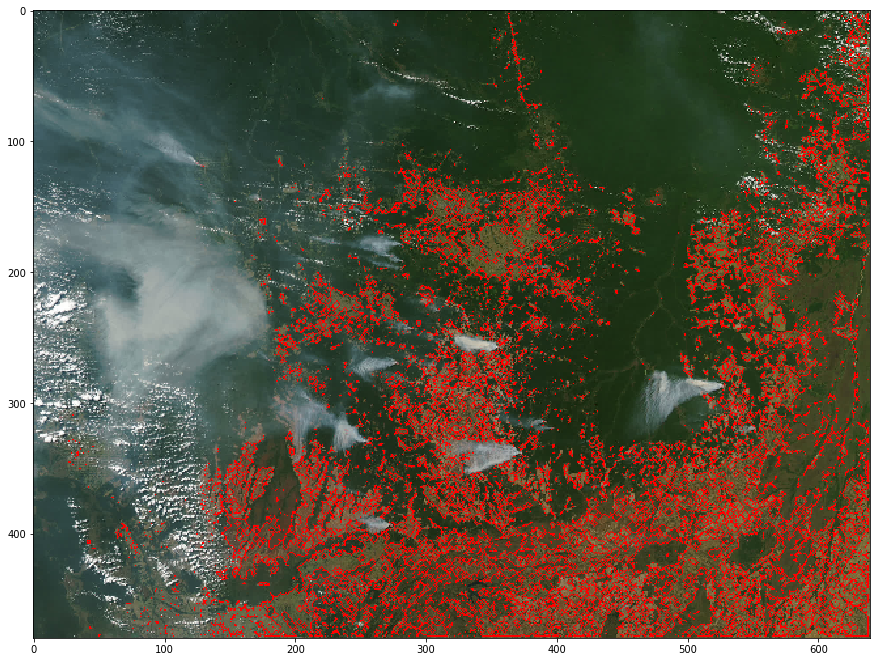

In [33]:
b = img.copy()
a = 255*(contourns).astype(np.uint8)
border = cv2.copyMakeBorder(a, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0 )

_, contours, hierarchy = cv2.findContours(a.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,offset=(0, 0))

#contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE, offset=(-1, -1))

plt.figure(figsize=(15,15))
cv2.drawContours(b, contours, -1, (255, 0, 0), 1)
plt.imshow(b, cmap='Greys_r',  interpolation='none')
plt.show()

In [34]:
area = 0
for con in contours:    
    area += cv2.contourArea(con)
print(area)
print(sum(sum(contourns)))

53869.5
50600


In [1]:
pixelsBrancos = sum(sum(contourns))
totalPixels = contourns.shape[0]*contourns.shape[1]
print('Area = ', round((pixelsBrancos/totalPixels)*100,2))

NameError: name 'contourns' is not defined

___

## Automatizando K-means

In [41]:
def color_difference (color1, color2):
    # Retorna a distância euclidiana entre duas cores no espaço RGB
    return math.sqrt(sum([(abs(component1-component2))**2 for component1, component2 in zip(color1, color2)]))

#Função retorna a imagem contornada e a área desmatada da mesma
def rgbKMeansImageSeg(img, num_clusters, defaultColors, difThres, it):
    
    #Define a proporção entre os dois lados da imagem
    prop = img.shape[1]/img.shape[0]
    
    #Redimensiona a imagem para a mesma sempre ter 480 de altura, sem alterar as proporções
    imgResized = cv2.resize(img,(round(480*prop),480))
    
    #Reshape da imagem deixar como um vetor de pixels contendo as 3 cores para o mesmo
    data = imgResized.reshape(imgResized.shape[0]*imgResized.shape[1], 3)

    #Cria um agrupamento K-means e ajusta o mesmo aos dados
    km = KMeans(n_clusters=num_clusters)
    km.fit(data)
    
    #Salva os labels encontrados
    labels = km.predict(data)
    img_labels = labels.reshape(imgResized.shape[:2])
    
    #Define clusters que estão próximos as cores default passadas
    chosenColors = set()
    for i, clusterColor in enumerate(km.cluster_centers_):
        for color in defaultColors:
            dif = color_difference(color,clusterColor)
            if dif < difThres:
                chosenColors.add(i)
    #Transforma o set em lista para poder indexar
    chosenColors = list(chosenColors)
    
    #Prints de teste - APAGAR DEPOIS
    print(km.cluster_centers_)
    print(chosenColors)
    
    #Cria a imagem binaria contendo o Target definido pelas cores padrão 
    binImageTarget = np.zeros((imgResized.shape[0], imgResized.shape[1]),dtype=bool)
    for label in chosenColors:
        img_mask = img_labels==label
        #PRECISA DO CLOSING????
        binImg = ndi.binary_closing(img_mask, iterations=it)
        #binImg = img_mask
        binImageTarget = (binImageTarget) | (binImg)
        
    imgContourned = imgResized.copy()
    imgAux = 255*(binImageTarget).astype(np.uint8)
    border = cv2.copyMakeBorder(imgAux, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0 )

    _, contours, hierarchy = cv2.findContours(imgAux.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,offset=(0, 0))
    
    #Desenha os contornos na imagem
    cv2.drawContours(imgContourned, contours, -1, (255, 0, 0), 1)
    
    #Calculando a area das queimadas
    whitePixels = sum(sum(binImageTarget))
    totalPixels = binImageTarget.shape[0]*binImageTarget.shape[1]
    area = round((whitePixels/totalPixels)*100, 2)
    
    return imgContourned, area

In [42]:
tonsMarrons = [(140,120,90),(60,40,10), (95,74,46)]
cinzaForte = [(202, 199, 193)]
branco = [(210,210,210)]

In [43]:
#img = cv2.imread('Imagens/def2.jpg',1)
#img = cv2.imread('Imagens/Alta_Floresta_AMO_2007217_lrg.jpg',1)
img = cv2.imread('Imagens/Brazil.A2003181.1720_lrg.jpg',1)
img = img[:, :, ::-1]
num_clusters = 10
defaultColors = tonsMarrons
#defaultColors = cinzaForte
start_time = time.time()
imagemCont, area = rgbKMeansImageSeg(img, num_clusters, defaultColors, 30, 1)
print("--- %s seconds ---" % (time.time() - start_time))

[[ 92.74685512  85.28803918  50.85540862]
 [ 66.15375023  68.50469345  37.4505487 ]
 [155.12366827 165.88771673 163.03645289]
 [ 32.6021841   52.39479345  26.44305333]
 [ 87.39379201 108.12241106 104.46942456]
 [120.56920541 134.09442796 131.83837784]
 [ 43.96912864  65.08148459  50.88905066]
 [220.83851675 223.82934609 220.8576555 ]
 [117.55129867 102.91447986  67.18431758]
 [ 62.20187291  84.56301003  78.29682274]]
[0]
--- 16.863794565200806 seconds ---


In [47]:
print('Area = {}%'.format(area))

Area = 16.49%


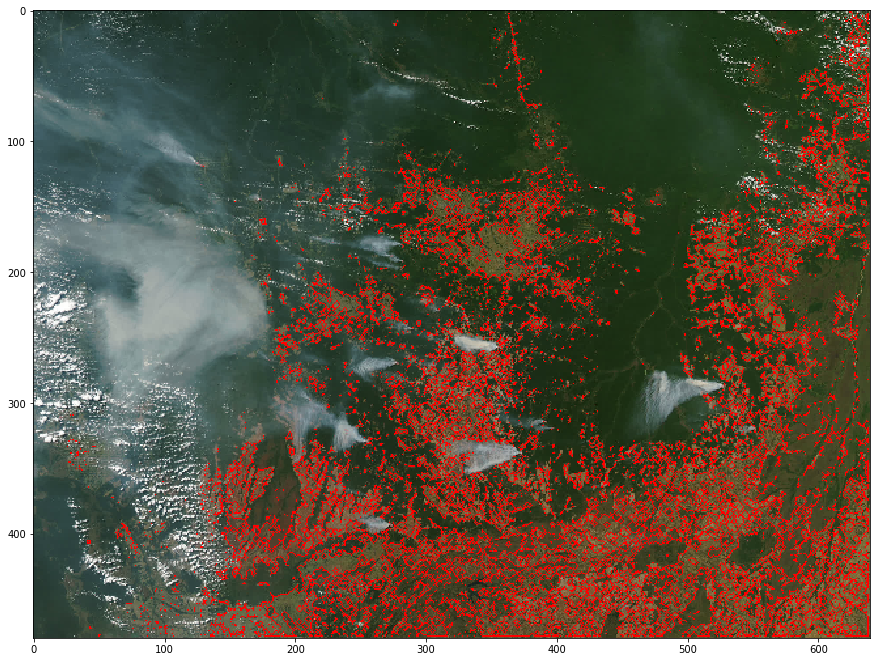

In [45]:
plt.figure(figsize=(15,15))
plt.imshow(imagemCont)
plt.savefig('image.png')

In [36]:
plt.savefig('image.png')

<Figure size 432x288 with 0 Axes>

In [37]:
?plt.savefig

___